In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [2]:
#load numpy array
data = np.load('./data/data_pca_50_target.npz')
data.files

['arr_0', 'arr_1']

In [3]:
data.allow_pickle = True

In [4]:
X = data['arr_0'] #pca data with 50 components
y = data['arr_1'] #target or dependent variable


In [5]:
X.shape,y.shape

((4319, 50), (4319,))

In [6]:
X

array([[ 0.87500479,  0.25726321,  0.2497782 , ...,  0.93410238,
        -0.07273305, -1.09960698],
       [ 1.17320121, -0.23166085,  0.32997371, ..., -0.92815437,
         1.1812324 ,  1.6038372 ],
       [-0.7846088 , -0.32022847,  0.35730457, ..., -0.52709456,
         0.96209983,  1.84512794],
       ...,
       [ 1.32978927,  0.62625788, -1.24674449, ...,  1.3943697 ,
         1.87775413,  1.19662022],
       [-1.23761691, -0.43789963, -0.43623775, ..., -0.40613792,
         0.16733914, -0.64106637],
       [ 1.2394078 ,  0.94157044,  0.11207923, ...,  0.25150811,
         0.23935138,  0.27737713]])

In [7]:
y

array(['female', 'female', 'female', ..., 'male', 'male', 'male'],
      dtype=object)

# Split the data into train and test

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,stratify =y)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(3455, 50) (864, 50) (3455,) (864,)


# Training machine learning mode

In [9]:
model_svc = SVC(probability = True)

param_grid = {'C':[0.5,1,10,20,30,50],
            'kernel':['rbf','poly'],
            'gamma':[0.1,0.05,0.01,0.001,0.002,0.005],
            'coef0':[0,1]
             }
       

In [10]:
model_grid = GridSearchCV(model_svc,
              param_grid = param_grid, 
              scoring = 'accuracy',cv=3,verbose =2)

In [11]:
model_grid.fit(x_train,y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV] END ..............C=0.5, coef0=0, gamma=0.1, kernel=rbf; total time=   2.9s
[CV] END ..............C=0.5, coef0=0, gamma=0.1, kernel=rbf; total time=   2.7s
[CV] END ..............C=0.5, coef0=0, gamma=0.1, kernel=rbf; total time=   2.1s
[CV] END .............C=0.5, coef0=0, gamma=0.1, kernel=poly; total time=   1.8s
[CV] END .............C=0.5, coef0=0, gamma=0.1, kernel=poly; total time=   1.8s
[CV] END .............C=0.5, coef0=0, gamma=0.1, kernel=poly; total time=   1.7s
[CV] END .............C=0.5, coef0=0, gamma=0.05, kernel=rbf; total time=   2.2s
[CV] END .............C=0.5, coef0=0, gamma=0.05, kernel=rbf; total time=   2.2s
[CV] END .............C=0.5, coef0=0, gamma=0.05, kernel=rbf; total time=   2.3s
[CV] END ............C=0.5, coef0=0, gamma=0.05, kernel=poly; total time=   1.4s
[CV] END ............C=0.5, coef0=0, gamma=0.05, kernel=poly; total time=   1.5s
[CV] END ............C=0.5, coef0=0, gamma=0.0

GridSearchCV(cv=3, estimator=SVC(probability=True),
             param_grid={'C': [0.5, 1, 10, 20, 30, 50], 'coef0': [0, 1],
                         'gamma': [0.1, 0.05, 0.01, 0.001, 0.002, 0.005],
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=2)

In [12]:
model_grid.best_params_

{'C': 10, 'coef0': 0, 'gamma': 0.005, 'kernel': 'rbf'}

In [13]:
model_final = model_grid.best_estimator_

In [19]:
model_final.get_params()

{'C': 10,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.005,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### Model Evaluation
Classification Report

Precision, Recall, F1-Score

Kappa Score

-ve (worst model)

0 to 0.5 (bad model)

0.5 to 0.7 (Good Model)

0.7 to 0.9 (Excellent Model)

0.9 to 1.0 (Perfect Model)

AUC

Less than 0.5 (Worst Model)

0.5 to 0.6 (Bad Model)

0.6 to 0.8 (Good Model)

0.8 to 0.9 (Excellent Model)

0.9 to 1.0 (Perfect Model)

In [14]:
y_pred = model_final.predict(x_test)

In [15]:
y_pred

array(['male', 'female', 'female', 'male', 'female', 'female', 'female',
       'male', 'male', 'female', 'female', 'female', 'male', 'male',
       'female', 'female', 'female', 'female', 'male', 'female', 'female',
       'female', 'female', 'female', 'male', 'female', 'male', 'male',
       'female', 'male', 'female', 'male', 'male', 'male', 'male',
       'female', 'female', 'male', 'female', 'female', 'male', 'female',
       'female', 'female', 'female', 'female', 'female', 'male', 'male',
       'male', 'male', 'female', 'female', 'female', 'male', 'female',
       'male', 'female', 'female', 'female', 'male', 'male', 'male',
       'female', 'male', 'female', 'female', 'female', 'male', 'female',
       'female', 'female', 'female', 'male', 'male', 'female', 'female',
       'male', 'female', 'male', 'female', 'female', 'male', 'female',
       'female', 'male', 'female', 'female', 'female', 'female', 'male',
       'female', 'female', 'male', 'female', 'male', 'female', 'femal

### Classification Report

In [16]:
cr = metrics.classification_report(y_test,y_pred,output_dict = True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
female,0.807611,0.800839,0.804211,477.000000
male,0.757033,0.764858,0.760925,387.000000
accuracy,0.784722,0.784722,0.784722,0.784722
macro avg,0.782322,0.782848,0.782568,864.000000
weighted avg,0.784956,0.784722,0.784822,864.000000


### kappa score

In [17]:
metrics.cohen_kappa_score(y_test,y_pred)

0.5651453898982027

### Area Under Curve (AUC)

In [18]:
metrics.roc_auc_score(np.where(y_test=="male",1,0),
np.where(y_pred == "male",1,0))

0.7828482277802155

Save Face Recognition Model

In [19]:
import pickle

In [20]:
pickle.dump(model_final,open('./model/model_svm.pickle',mode ='wb'))

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
cv_results = pd.DataFrame(model_grid.cv_results_)

In [23]:
param = ['param_C','param_coef0','param_gamma','param_kernel']
cv_results = cv_results[param+['mean_test_score']]
cv_results[param] = cv_results[param].astype(str)

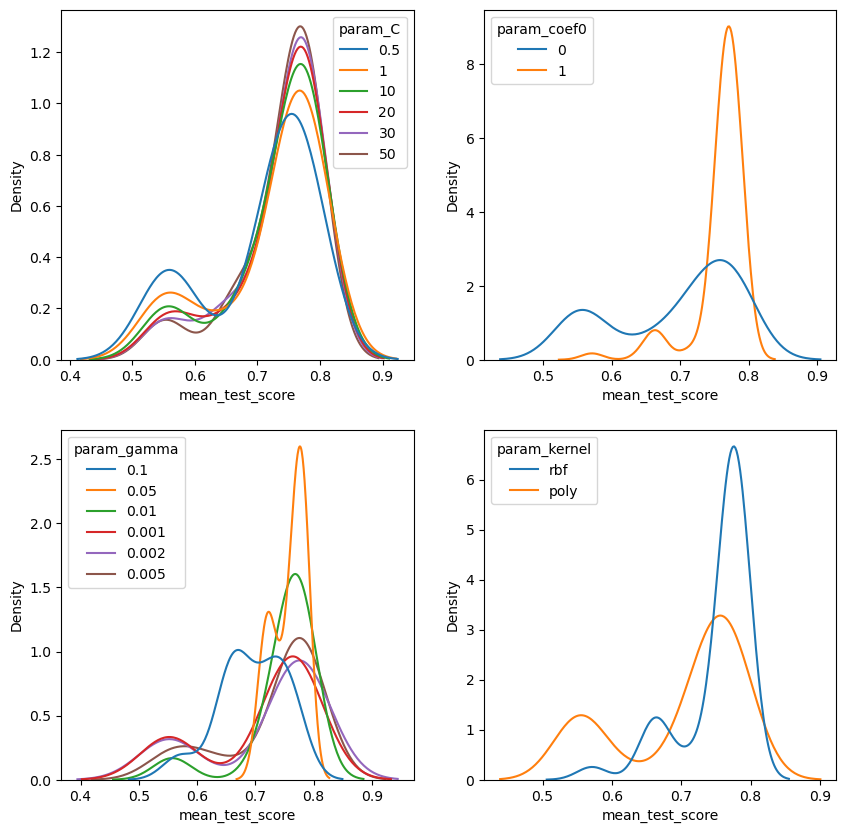

In [24]:
plt.figure(figsize=(10,10))
for i, par in enumerate(param):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=cv_results,x='mean_test_score',hue=par)

In [25]:
model_grid.best_params_

{'C': 10, 'coef0': 0, 'gamma': 0.005, 'kernel': 'rbf'}